In [2]:
# notebooks/01_debug_mike.ipynb

import sys
sys.path.append('../src')

from pathlib import Path
import mikeio
import numpy as np
import zarr

print(mikeio.__version__)

# Load data
data_path = Path('/teamspace/studios/this_studio/data/basin_2dv.dfsu')
ds = mikeio.read(data_path)



# Debug information
print("Dataset information:")
print(f"Type: {type(ds)}")
print(f"Shape: {ds.shape}")
print(f"\nGeometry type: {type(ds.geometry)}")
print(f"Number of elements: {ds.geometry.n_elements}")
print(f"Number of nodes: {ds.geometry.n_nodes}")

print("\nElement table information:")
print(f"Type: {type(ds.geometry.element_table)}")
print(f"Shape: {ds.geometry.element_table.shape}")
print(f"First element: {ds.geometry.element_table[0]}")

# Try the converter
from zarrcatalogue.converters.mike import MIKEConverter
converter = MIKEConverter()

print("\nConverting file...")
metadata = converter.to_zarr(data_path, Path('/teamspace/studios/this_studio/data_zarr/test_conversion.zarr'))

print("\nMetadata:")
for key, value in metadata.items():
    print(f"{key}: {value}")

# Validate conversion
store = zarr.open('/teamspace/studios/this_studio/data_zarr/test_conversion.zarr', 'r')
print("\nZarr structure:")
print(store.tree())

2.2.0
Dataset information:
Type: <class 'mikeio.dataset._dataset.Dataset'>
Shape: (3, 640)

Geometry type: <class 'mikeio.spatial._FM_geometry_layered.GeometryFMVerticalProfile'>
Number of elements: 640
Number of nodes: 715

Element table information:
Type: <class 'numpy.ndarray'>
Shape: (640,)
First element: [ 0 11 12  1]

Converting file...

Metadata:
model_type: MIKE
converter_version: 0.1.0
conversion_time: 2024-12-10T13:57:45.112006
input_file: /teamspace/studios/this_studio/data/basin_2dv.dfsu
mikeio_version: 2.2.0
geometry_type: GeometryFMVerticalProfile
n_elements: 640
n_nodes: 715
n_timesteps: 3
variables: ['U velocity', 'V velocity', 'W velocity']
time_range: ['2004-01-01 00:00:00', '2004-01-01 00:20:00']
element_info: {'max_nodes_per_element': 4, 'min_nodes_per_element': 4, 'element_types_present': [4], 'n_elements_4_nodes': 640}
chunks: {'time': 3, 'elements': -1}
compression_level: 5

Zarr structure:
/
 ├── data
 │   ├── U velocity (3, 640) float32
 │   ├── V velocity (3, 

<Axes: title={'center': '2004-01-01 00:00:00'}, xlabel='relative distance [m]', ylabel='z [m]'>

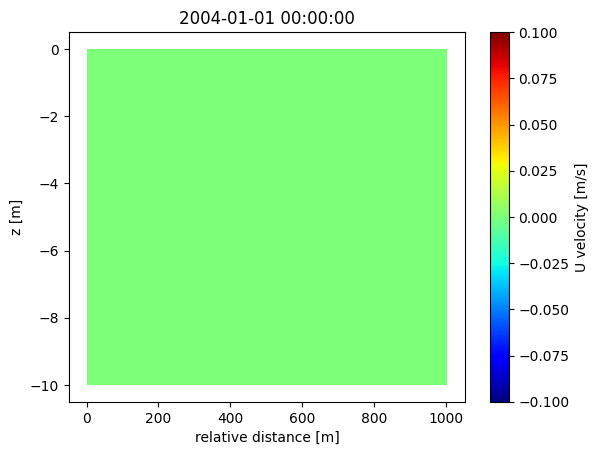

In [5]:
ds["U velocity"].plot(time_step=0)

<Axes: title={'center': '2004-01-01 00:00:00'}, xlabel='relative distance [m]', ylabel='z [m]'>

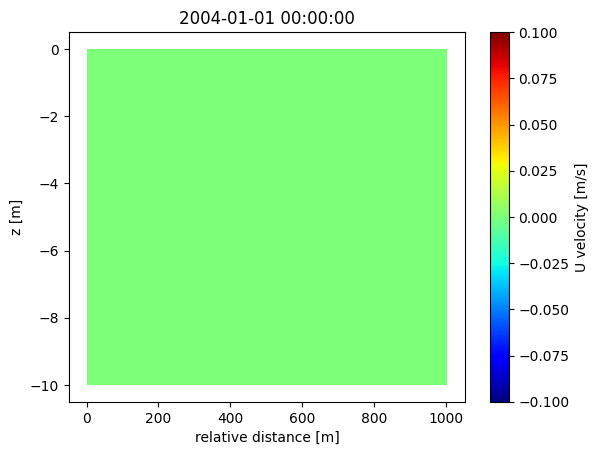

In [7]:
ds["U velocity"].plot(x=400, z=-5)